In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Path = 'drive/MyDrive/Dataset/PlantVillage'
Path1 = 'drive/MyDrive/Dataset/NewFolder'

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(Path, output=Path1, seed=42, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 2152 files [00:58, 36.66 files/s]


In [ ]:
import os
len(os.listdir('/content/drive/MyDrive/Dataset/NewFolder/val/Potato___healthy'))

15

In [ ]:
train_path = Path1+'/train'
val_path = Path1+'/val'
test_path = Path1+'/test'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_data = train_datagen.flow_from_directory(train_path, target_size=(256,256), batch_size=32, class_mode='binary')

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(val_path, target_size=(256,256), batch_size=32, class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(test_path, target_size=(256,256), batch_size=32, class_mode='binary')

Found 1721 images belonging to 3 classes.
Found 215 images belonging to 3 classes.
Found 216 images belonging to 3 classes.


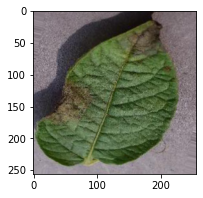

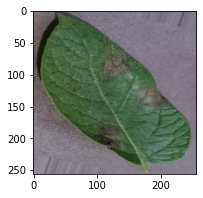

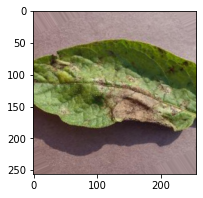

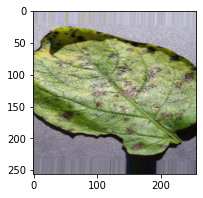

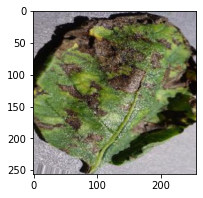

In [ ]:
t_img, label = train_data.next()

def plotimage(image_arr, label):

  for img, l  in zip(image_arr, label):
    plt.subplots(figsize=(3,3))
    plt.imshow(img)
    plt.show()


plotimage(t_img[:5], label[:5])

In [ ]:

cnn_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256,256,3]),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     keras.layers.Dropout(0.5),
                                     keras.layers.Flatten(),
                                     keras.layers.Dense(units=128, activation='relu'),
                                     keras.layers.Dropout(0.1),
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units=3, activation='softmax') #unit is three because we have 3 classes
                                     ])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(train_data, epochs= 20, verbose=1, validation_data=valid_data)

Epoch 1/20
54/54 [==============================] - 27s 507ms/step - loss: 0.0992 - accuracy: 0.9663 - val_loss: 0.1924 - val_accuracy: 0.9302
Epoch 2/20
54/54 [==============================] - 28s 510ms/step - loss: 0.1074 - accuracy: 0.9634 - val_loss: 0.1197 - val_accuracy: 0.9535
Epoch 3/20
54/54 [==============================] - 28s 509ms/step - loss: 0.1699 - accuracy: 0.9343 - val_loss: 0.2046 - val_accuracy: 0.9023
Epoch 4/20
54/54 [==============================] - 27s 509ms/step - loss: 0.0628 - accuracy: 0.9768 - val_loss: 0.0565 - val_accuracy: 0.9767
Epoch 5/20
54/54 [==============================] - 27s 507ms/step - loss: 0.2166 - accuracy: 0.9285 - val_loss: 0.1109 - val_accuracy: 0.9581
Epoch 6/20
54/54 [==============================] - 28s 510ms/step - loss: 0.1014 - accuracy: 0.9657 - val_loss: 0.0691 - val_accuracy: 0.9814
Epoch 7/20
54/54 [==============================] - 28s 516ms/step - loss: 0.0845 - accuracy: 0.9651 - val_loss: 0.1327 - val_accuracy: 0.9442

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

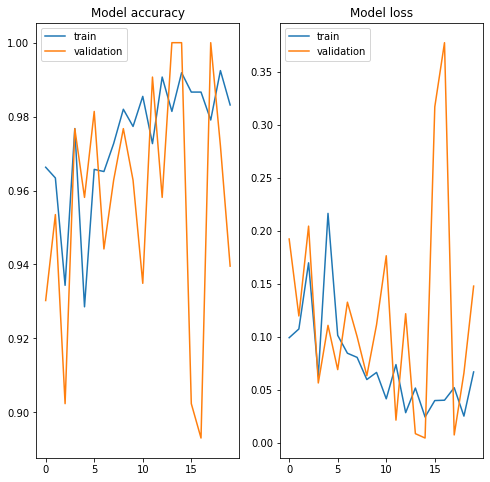

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(20), acc, label='Training accuracy')
plt.plot(range(20), val_acc, label='Validation accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.title('Model accuracy')

plt.subplot(1,2,2)
plt.plot(range(20), loss, label='Training loss')
plt.plot(range(20), val_loss, label='Validation loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.title('Model loss')

plt.show()

In [ ]:
ACC = cnn_model.evaluate(test_data)[1]
print(f'Accuracy of the model is = {ACC*100} % ')

7/7 [==============================] - 1s 99ms/step - loss: 0.1277 - accuracy: 0.9676
Accuracy of the model is = 96.75925970077515 % 


In [ ]:
print(train_data.class_indices)

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


2
Potato___healthy


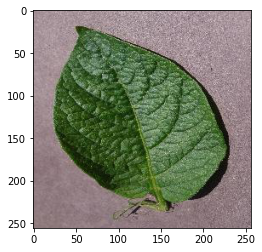

In [ ]:
def prediction(path):

  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  i = i/255
  i = np.expand_dims(i, axis=0)
  result = cnn_model.predict(i)
  print(np.argmax(result))

  classes = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
  print(classes[np.argmax(result)])

  plt.imshow(Image.open(path))
  plt.show()

path = '/content/drive/MyDrive/Dataset/NewFolder/test/Potato___healthy/30126310-39de-4c02-b10a-23409417a4f6___RS_HL 1826.JPG'
prediction(path)